In [18]:
# --- Libraries 
from Objects.ClassAPC import *
from Objects.Geometry import *
from Objects.Performance import *
from Search.SearchTree import *

Initially, it is recommended to verify if the propeller is in the APC database. For this purpose, object propeller is created and the method "searchPropeller" is used, adressing the propeller code and the type of file selected as "perf" (performance) or "geo" (geometry).

If the propeller is not present in the database, an error will be returned.

In [19]:
# Propeller class initiailization
prop = APC_propeller()

# --- Example 1
propeller_name = "10x45MR"
prop_path = prop.searchPropeller(propeller=propeller_name, label="perf")
print(prop_path)

# --- Example 2
propeller_name_2 = "20x10E"
prop_geo_path2 = prop.searchPropeller(propeller=propeller_name_2, label='geo')
print(prop_geo_path2)


C:\Users\dunca\Desktop\UFSC\APC - Propeller data\APC - Propeller Finder\APC - Perfomance Data\PERFILES2\PER3_10x45MR.dat
C:\Users\dunca\Desktop\UFSC\APC - Propeller data\APC - Propeller Finder\APC - Geometry Data\PE0-FILES_WEB\20x10E-PERF.PE0


To obtain all geometry or performance data from a propeller, the method "read_data" is called. 

To find geometry data, the object Geometry must be created. After using "read_data", the output is two distincts dataframes: one containing all radial distributions data and the second with the remaining data.

In [20]:

prop_example = Geometry()

df_radial_Data, df_general_data = prop_example.read_data("5x45E")

print(df_radial_Data.head(n=3))
print(df_general_data.head())


   STATION (IN)  CHORD (IN)  PITCH (QUOTED)  PITCH (LE-TE)  PITCH (PRATHER)  \
0        0.6643      0.6326             4.6            4.6           4.4413   
1        0.6942      0.6382             4.6            4.6           4.4512   
2        0.7242      0.6434             4.6            4.6           4.4604   

   SWEEP (IN)  THICKNESS RATIO  TWIST (DEG)  MAX-THICK (IN)  \
0      0.2565           0.1263      47.7822          0.0799   
1      0.2595           0.1235      46.5221          0.0788   
2      0.2623           0.1209      45.3125          0.0778   

   CROSS-SECTION (IN**2)  ZHIGH (IN)  CGY (IN)  CGZ (IN)  
0                 0.0316      0.2528    0.0569    0.0726  
1                 0.0315      0.2512    0.0542    0.0736  
2                 0.0314      0.2495    0.0515    0.0745  
   RADIUS  HUBTRA  BLADES  TOTAL WEIGHT (Kg)  TOTAL VOLUME (IN**3)  \
0     2.5    0.66     2.0           0.004844              0.174018   

   TOTAL PROJECTED AREA (IN**2)  MOMENT OF INERTIA (K

For the performance data, the procedure is similar, as shown bellow.

In [21]:
prop_example = Performance()

df_perf = prop_example.read_data("20x10E")

print(df_perf.head())

    RPM  V (mph)  J (Adv_Ratio)      Pe      Ct      Cp  PWR (Hp)  \
0  1000     0.00         0.0000  0.0000  0.0824  0.0303     0.008   
1  1000     0.42         0.0222  0.0588  0.0810  0.0306     0.008   
2  1000     0.84         0.0444  0.1145  0.0795  0.0308     0.008   
3  1000     1.26         0.0666  0.1671  0.0779  0.0311     0.008   
4  1000     1.68         0.0887  0.2166  0.0762  0.0312     0.008   

   Torque (In-Lbf)  Thrust (Lbf)  PWR (W)  Torque (N-m)  Thrust (N)  \
0            0.491         0.420    5.814         0.056       1.869   
1            0.496         0.413    5.869         0.056       1.838   
2            0.500         0.406    5.919         0.057       1.804   
3            0.504         0.397    5.962         0.057       1.768   
4            0.507         0.389    5.998         0.057       1.729   

   THR/PWR (g/W)  Mach     Reyn     FOM  
0         32.782  0.08  36690.0  0.6235  
1         31.929  0.08  36711.0  0.6021  
2         31.079  0.08  36734.0 

It is also possible to visualize the nondimensional values and performance map of the propeller.

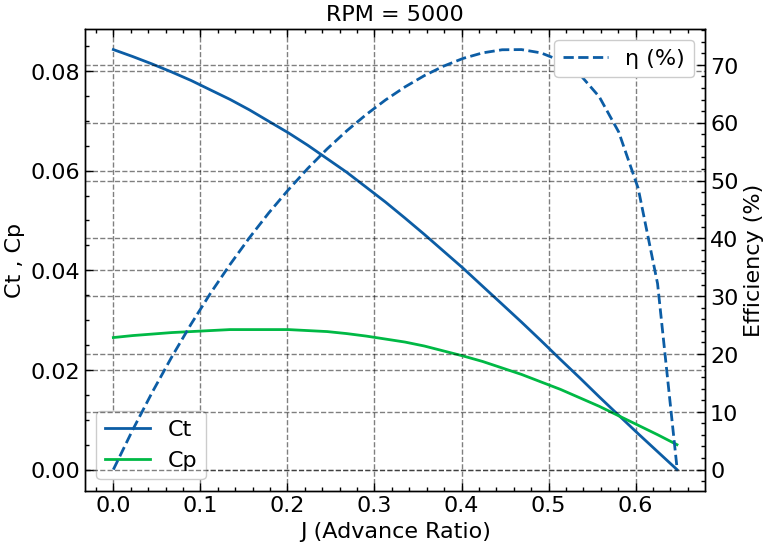

In [22]:
prop_example.plot(df_perf, RPM = 5000)

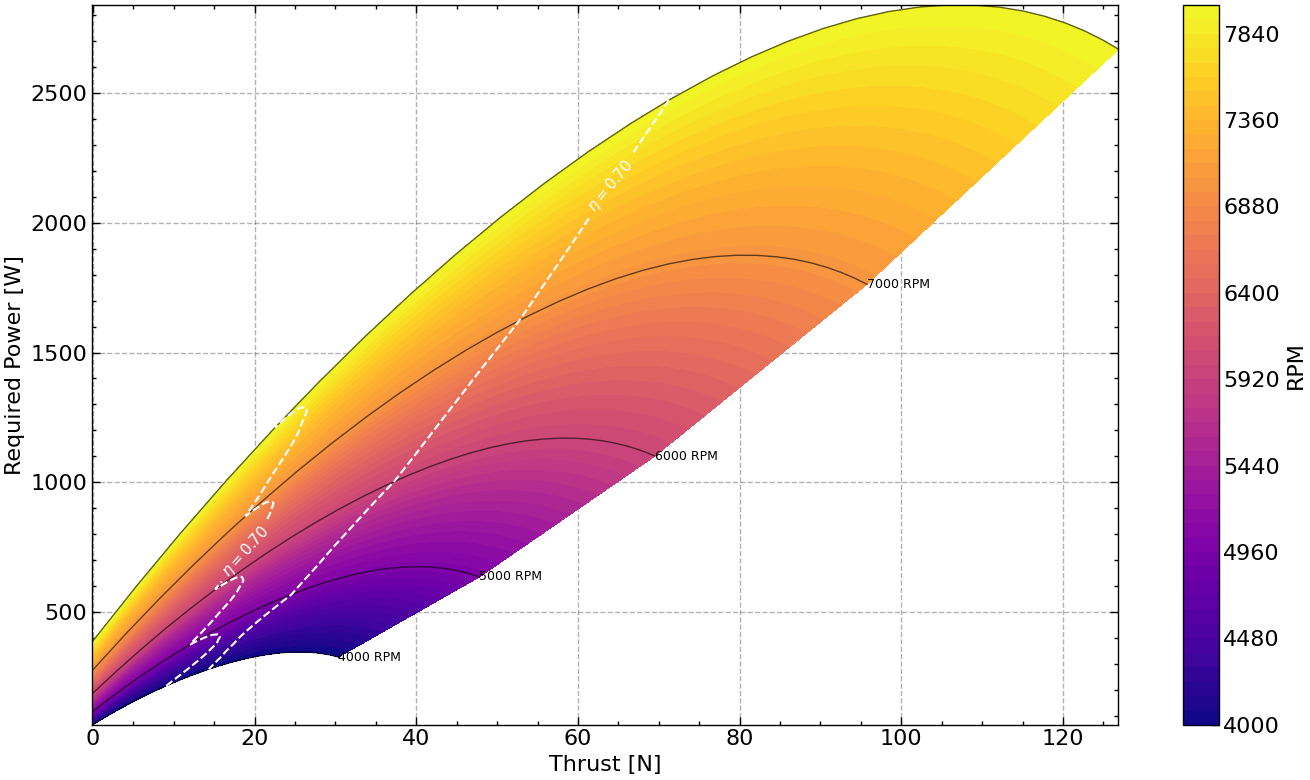

In [23]:
prop_example.performance_map(df_perf, rpm_min=4000, rpm_max=8000, eta_range=[0.7])

To search for a propeller based on different constraints, it is possible to define a specific range for each design variable, as shown in the example bellow.

In [24]:
searcher = PropellerSearchTree()

# 1. Search by range
limited_props = searcher.search_by_range(constraints={
                                                    'prop_type': ['E','E-3'],
                                                    'D (in)': (None, None), # if not specificed here, it is assumed to be None
                                                    'RPM': (None, None),
                                                    'maxThrust (N)': (40, None), # T > 40N
                                                    'maxPower (W)': (None, 600), # P < 600W
                                                    'maxTorque (Nm)': (None, None),
                                                    'maxFoM'          : (None, None),                  
                                                    'max THR/PWR (g/W)': (None, None)
                                                      },
                                        sort_by='maxFoM')
print(limited_props[['prop_id', 'maxThrust (N)', 'maxPower (W)', 'RPM']])

      prop_id  maxThrust (N)  maxPower (W)   RPM
3868    20x8E         41.079       515.407  5000
4008   22x10E         41.713       490.604  4000
4081   26x13E         48.631       533.484  3000
4072  25x125E         41.908       444.397  3000
3529   19x10E         40.677       569.204  5000
3975   21x13E         41.550       575.774  4000
